name: linear_mapping.ipynb

This notebook's job is to train a linear model to map the DragoNN outputs for our canola sequence to its true expression value. Next, we visualize the results as a preliminary round of error analysis.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import spearmanr # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [ ]:
# read in dataframe
df_target = pd.read_csv('data/raw/CanolaOrganelles_v.1.tsv', sep="\t", header=None)
df_target.columns = ["sequence", "target_value"]

In [ ]:
# read in node values
df_input = pd.read_csv('data/processed/CanolaTargetsKipoi.csv', index_col=0)  # generated using kipoi

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

In [ ]:
df.shape

(74886, 14)

In [ ]:
df.head()

,sequence,target_value,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
0,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,0.26,0.057193,0.062877,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665
1,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,0.27,0.248029,0.314535,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852
2,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,0.27,0.265661,0.229094,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023
3,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,0.27,0.369960,0.425548,0.464377,0.072154,0.109100,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659
4,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,0.27,0.371397,0.450313,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153


In [ ]:
# grab input features and target feature
X = np.array(df[["node"+str(i) for i in range(1,13)]])
y = np.array(df["target_value"])

In [ ]:
X.shape

(74886, 12)

In [ ]:
y.shape

(74886,)

In [ ]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1202)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)  # train linear regression

In [ ]:
reg.coef_

array([ 2.09364299,  1.97596378, -3.57124172, -1.25254889, -0.96797239,
        2.01597182, -0.3131101 , -0.0543585 ,  0.33558921,  2.57356655,
        2.29862459, -4.12201961])

In [ ]:
reg.score(X_test, y_test)  # coefficient of determination R^2

0.017731038384791287

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)  # MSE

0.25984639023031986

In [ ]:
spearmanr(y_test, y_pred)  # spearman coefficient

SpearmanrResult(correlation=0.09526382958107715, pvalue=1.5309110317036587e-31)

In [ ]:
print("Mean of target values:\t\t", np.mean(y_test))
print("Mean of predicted values:\t", np.mean(y_pred))

Mean of target values:		 -0.2825637601815997
Mean of predicted values:	 -0.28727405190932137


In [ ]:
print("Std.dev of target values:\t", np.std(y_test))
print("Std.dev of predicted values:\t", np.std(y_pred))

Std.dev of target values:	 0.5143315119973474
Std.dev of predicted values:	 0.06735043310241956


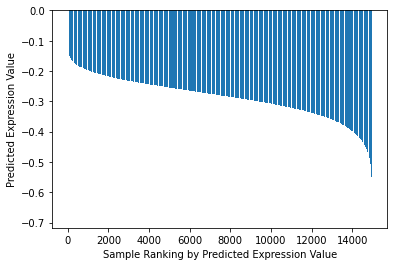

In [ ]:
# visualize ranking of predicted values

plt.bar([i for i in range(len(y_pred))], sorted(y_pred, reverse=True))
plt.xlabel("Sample Ranking by Predicted Expression Value")
plt.ylabel("Predicted Expression Value")
plt.show()

In [ ]:
# generate a random sample of 
sample = pd.DataFrame([y_test, y_pred]).transpose().sample(25).reset_index().drop(columns=["index"])
sample.head()

,0,1
0,0.27,-0.269330
1,0.50,-0.276861
2,-0.78,-0.210658
3,-0.47,-0.420075
4,0.77,-0.262807


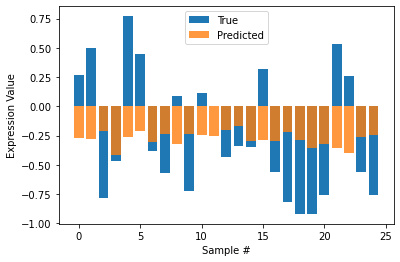

In [ ]:
# sample y_true and y_pred and visualize comparison

plt.bar(sample.index, sample[0], alpha=1)
plt.bar(sample.index, sample[1], alpha=0.8)
plt.legend(["True", "Predicted"])
plt.xlabel("Sample #")
plt.ylabel("Expression Value")
plt.show()

---
### Test Linear Regression on Keras Created Vectors

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import spearmanr # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [ ]:
# read in dataframe
df_target = pd.read_csv('data/raw/CanolaOrganelles_v.1.tsv', sep="\t", header=None)
df_target.columns = ["sequence", "target_value"]

In [ ]:
# read in node values
df_input = pd.read_csv('data/processed/CanolaTargetsKeras.csv', index_col=0)  # generated using keras

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

In [ ]:
df.shape

(74886, 14)

In [ ]:
df.head()

,sequence,target_value,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
0,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,0.26,0.057192,0.062877,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665
1,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,0.27,0.248029,0.314535,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852
2,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,0.27,0.265661,0.229094,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023
3,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,0.27,0.369960,0.425547,0.464377,0.072154,0.109099,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659
4,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,0.27,0.371398,0.450313,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153


In [ ]:
# grab input features and target feature
X = np.array(df[["node"+str(i) for i in range(1,13)]])
y = np.array(df["target_value"])

In [ ]:
X.shape

(74886, 12)

In [ ]:
y.shape

(74886,)

In [ ]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1202)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([ 2.1030798 ,  1.98731475, -3.58903616, -1.25141427, -0.96775597,
        2.01578608, -0.30854262, -0.04911962,  0.32728507,  2.57724971,
        2.30259976, -4.12928712])

In [ ]:
# array([ 2.09364299,  1.97596378, -3.57124172, -1.25254889, -0.96797239,
#         2.01597182, -0.3131101 , -0.0543585 ,  0.33558921,  2.57356655,
#         2.29862459, -4.12201961])
# previous coefficients

In [ ]:
reg.score(X_test, y_test)  # coefficient of determination R^2

0.017678825529412356

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)  # MSE

0.259860202457443

In [ ]:
spearmanr(y_test, y_pred)  # spearman coefficient

SpearmanrResult(correlation=0.09506623650015622, pvalue=2.038249639131839e-31)

In [ ]:
print("Mean of target values:\t\t", np.mean(y_test))
print("Mean of predicted values:\t", np.mean(y_pred))

Mean of target values:		 -0.2825637601815997
Mean of predicted values:	 -0.2872742741374246


In [ ]:
print("Std.dev of target values:\t", np.std(y_test))
print("Std.dev of predicted values:\t", np.std(y_pred))

Std.dev of target values:	 0.5143315119973474
Std.dev of predicted values:	 0.06726639917754762


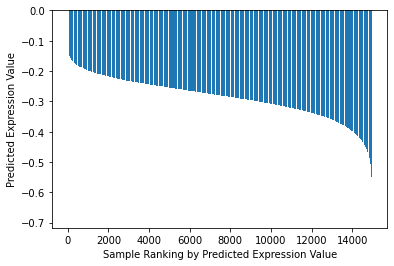

In [ ]:
plt.bar([i for i in range(len(y_pred))], sorted(y_pred, reverse=True))
plt.xlabel("Sample Ranking by Predicted Expression Value")
plt.ylabel("Predicted Expression Value")
plt.show()

In [ ]:
# generate a random sample of 
sample = pd.DataFrame([y_test, y_pred]).transpose().sample(25).reset_index().drop(columns=["index"])
sample.head()

,0,1
0,0.56,-0.306999
1,0.66,-0.151788
2,-0.81,-0.301514
3,-0.90,-0.407252
4,-0.05,-0.406746


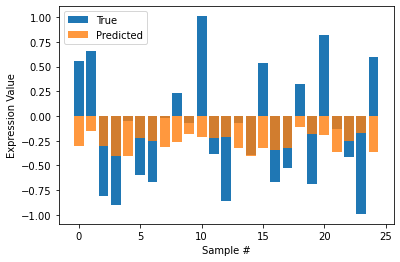

In [ ]:
plt.bar(sample.index, sample[0], alpha=1)
plt.bar(sample.index, sample[1], alpha=0.8)
plt.legend(["True", "Predicted"])
plt.xlabel("Sample #")
plt.ylabel("Expression Value")
plt.show()

---
### Test Linear Regression on Only NT Frequencies

In [ ]:
for nt in ["A", "T", "C", "G"]:
    df[nt] = df["sequence"].str.count(nt)

In [ ]:
df.shape

(74886, 18)

In [ ]:
df.head()

,sequence,target_value,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12,A,T,C,G
0,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,0.26,0.057192,0.062877,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665,39,40,40,26
1,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,0.27,0.248029,0.314535,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852,40,40,39,26
2,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,0.27,0.265661,0.229094,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023,38,38,42,27
3,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,0.27,0.369960,0.425547,0.464377,0.072154,0.109099,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659,40,36,42,27
4,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,0.27,0.371398,0.450313,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153,41,39,39,26


In [ ]:
# grab input features and target feature
X = np.array(df[["A", "T", "C", "G"]])
y = np.array(df["target_value"])

In [ ]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1202)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([5.09451462e+10, 5.09451462e+10, 5.09451462e+10, 5.09451462e+10])

In [ ]:
reg.score(X_test, y_test)  # coefficient of determination R^2

0.02295342504853648

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)  # MSE

0.25846487622958253

In [ ]:
spearmanr(y_test, y_pred)  # spearman coefficient

SpearmanrResult(correlation=0.10206875720738781, pvalue=5.5655674776328336e-36)

In [ ]:
print("Mean of target values:\t\t", np.mean(y_test))
print("Mean of predicted values:\t", np.mean(y_pred))

Mean of target values:		 -0.2825637601815997
Mean of predicted values:	 -0.28753741164124047


In [ ]:
print("Std.dev of target values:\t", np.std(y_test))
print("Std.dev of predicted values:\t", np.std(y_pred))

Std.dev of target values:	 0.5143315119973474
Std.dev of predicted values:	 0.07720950615406547


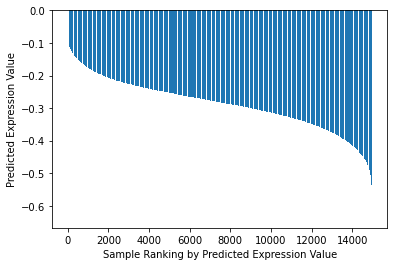

In [ ]:
plt.bar([i for i in range(len(y_pred))], sorted(y_pred, reverse=True))
plt.xlabel("Sample Ranking by Predicted Expression Value")
plt.ylabel("Predicted Expression Value")
plt.show()

In [ ]:
# generate a random sample of 
sample = pd.DataFrame([y_test, y_pred]).transpose().sample(25).reset_index().drop(columns=["index"])
sample.head()

,0,1
0,-0.78,-0.222656
1,0.63,-0.182617
2,-0.50,-0.293945
3,0.54,-0.190430
4,-0.10,-0.260742


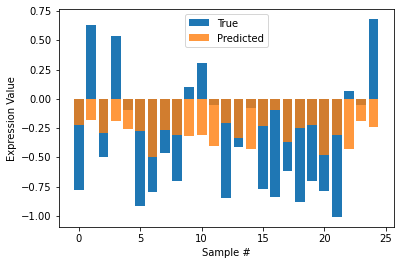

In [ ]:
plt.bar(sample.index, sample[0], alpha=1)
plt.bar(sample.index, sample[1], alpha=0.8)
plt.legend(["True", "Predicted"])
plt.xlabel("Sample #")
plt.ylabel("Expression Value")
plt.show()

---
### Comparing Keras and Kipoi vectors

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_kipoi = pd.read_csv('data/processed/CanolaTargetsKipoi.csv', index_col=0)

In [ ]:
df_keras = pd.read_csv('data/processed/CanolaTargetsKeras.csv', index_col=0)

In [ ]:
df_kipoi.head()

,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
0,0.057193,0.062877,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665
1,0.248029,0.314535,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852
2,0.265661,0.229094,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023
3,0.369960,0.425548,0.464377,0.072154,0.109100,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659
4,0.371397,0.450313,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153


In [ ]:
df_keras.head()

,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
0,0.057192,0.062877,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665
1,0.248029,0.314535,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852
2,0.265661,0.229094,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023
3,0.369960,0.425547,0.464377,0.072154,0.109099,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659
4,0.371398,0.450313,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153


In [ ]:
df_kipoi.tail()

,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
74881,0.152861,0.098641,0.144980,0.027386,0.080423,0.068115,0.150996,-0.008054,0.086877,-0.046644,0.108610,0.032764
74882,0.164062,0.162143,0.190059,0.086969,-0.023107,0.039091,0.214144,0.073554,0.172308,-0.009724,0.006846,-0.009138
74883,0.277453,0.210435,0.281420,0.119688,0.076970,0.115687,0.244967,0.114259,0.210322,0.022490,0.083391,0.054204
74884,0.157357,0.105108,0.151819,-0.076939,-0.047714,-0.070762,0.014980,-0.009687,0.002792,-0.166218,-0.009043,-0.110434
74885,0.047691,0.077933,0.074711,0.021601,-0.021100,-0.001105,0.032925,0.026993,0.034476,-0.063723,-0.038778,-0.067575


In [ ]:
df_keras.tail()

,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
74881,0.152861,0.098641,0.144980,0.027386,0.080423,0.068115,0.150996,-0.008054,0.086877,-0.046644,0.108610,0.032764
74882,0.164062,0.162143,0.190059,0.086968,-0.023107,0.039091,0.214144,0.073554,0.172308,-0.009725,0.006846,-0.009138
74883,0.277453,0.210435,0.281420,0.119688,0.076970,0.115687,0.244967,0.114259,0.210322,0.022490,0.083391,0.054204
74884,0.157357,0.105108,0.151819,-0.076939,-0.047714,-0.070762,0.014980,-0.009687,0.002792,-0.166218,-0.009043,-0.110434
74885,0.047691,0.077933,0.074711,0.021601,-0.021100,-0.001105,0.032925,0.026993,0.034476,-0.063723,-0.038778,-0.067575


In [ ]:
max(list(np.array(df_kipoi - df_keras).reshape(1, -1)[0]))

0.3098979773

---
### Chloroplast-Specific Linear Mapping

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import spearmanr # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [ ]:
# read in dataframe
df_target = pd.read_csv('data/raw/hidra.tsv', sep="\t", header=None)
# df_target.columns = ["sequence", "target_value"]

In [ ]:
# read in node values
df_input = pd.read_csv('data/processed/CanolaTargetsKeras.csv', index_col=0)

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

In [ ]:
df = df[df[0] == "NC_016734.1"]

In [ ]:
df.shape

(30544, 21)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,node1,...,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26,0.057192,...,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27,0.248029,...,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27,0.265661,...,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27,0.369960,...,0.464377,0.072154,0.109099,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27,0.371398,...,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153


In [ ]:
# grab input features and target feature
X = np.array(df[["node"+str(i) for i in range(1,13)]])
y = np.array(df[8])

In [ ]:
X.shape

(30544, 12)

In [ ]:
y.shape

(30544,)

In [ ]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1202)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([  7.99698816,   8.01838875, -14.16833416,  -0.7837346 ,
        -0.55368052,   1.44954688,   1.15413324,   1.89572412,
        -2.46109255,   1.79177437,   1.40149856,  -2.78625353])

In [ ]:
# array([ 2.09364299,  1.97596378, -3.57124172, -1.25254889, -0.96797239,
#         2.01597182, -0.3131101 , -0.0543585 ,  0.33558921,  2.57356655,
#         2.29862459, -4.12201961])
# previous coefficients

In [ ]:
reg.score(X_test, y_test)  # coefficient of determination R^2

0.2588787004154125

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)  # MSE

0.197135456521024

In [ ]:
spearmanr(y_test, y_pred)  # spearman coefficient

SpearmanrResult(correlation=0.5138184825591656, pvalue=0.0)

In [ ]:
print("Mean of target values:\t\t", np.mean(y_test))
print("Mean of predicted values:\t", np.mean(y_pred))

Mean of target values:		 -0.12667212309706988
Mean of predicted values:	 -0.11397567047101727


In [ ]:
print("Std.dev of target values:\t", np.std(y_test))
print("Std.dev of predicted values:\t", np.std(y_pred))

Std.dev of target values:	 0.5157482036516533
Std.dev of predicted values:	 0.2604213824523877


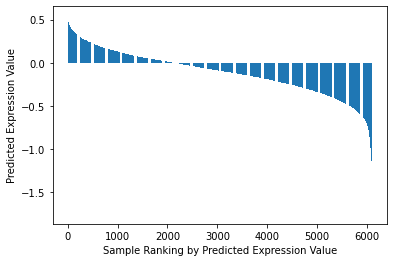

In [ ]:
plt.bar([i for i in range(len(y_pred))], sorted(y_pred, reverse=True))
plt.xlabel("Sample Ranking by Predicted Expression Value")
plt.ylabel("Predicted Expression Value")
plt.show()

In [ ]:
# generate a random sample of 
sample = pd.DataFrame([y_test, y_pred]).transpose().sample(25).reset_index().drop(columns=["index"])
sample.head()

,0,1
0,0.91,0.386211
1,0.03,-0.234758
2,-0.48,0.077248
3,0.23,0.289543
4,-0.91,-0.247377


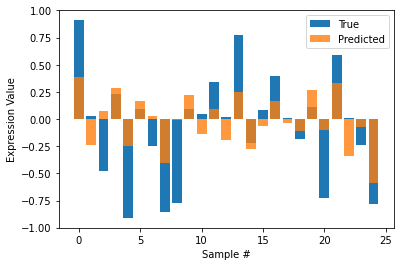

In [ ]:
plt.bar(sample.index, sample[0], alpha=1)
plt.bar(sample.index, sample[1], alpha=0.8)
plt.legend(["True", "Predicted"])
plt.xlabel("Sample #")
plt.ylabel("Expression Value")
plt.show()

---
### Mitochondion-Specific Linear Mapping

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import spearmanr # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [ ]:
# read in dataframe
df_target = pd.read_csv('data/raw/hidra.tsv', sep="\t", header=None)

In [ ]:
# read in node values
df_input = pd.read_csv('data/processed/CanolaTargetsKeras.csv', index_col=0)

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

In [ ]:
df = df[df[0] == "NC_008285.1"]

In [ ]:
df.shape

(44342, 21)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,node1,...,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
30544,NC_008285.1,0,145,CTGCAGTGCCTTCCCCCCCCTAGTCTAGACCGAGTATCAATAGTTG...,265,72,89.83,92.40,0.04,0.063575,...,0.149261,0.081778,-0.025158,0.035122,0.123482,0.121610,0.147521,-0.024234,0.074328,0.029143
30545,NC_008285.1,5,150,GTGCCTTCCCCCCCCTAGTCTAGACCGAGTATCAATAGTTGTAGTT...,274,77,92.88,98.81,0.09,0.153366,...,0.147161,0.152094,0.095178,0.148272,0.086009,0.034643,0.074733,0.033392,0.173583,0.116363
30546,NC_008285.1,10,155,TTCCCCCCCCTAGTCTAGACCGAGTATCAATAGTTGTAGTTCCTGT...,279,79,94.58,101.38,0.10,0.190854,...,0.269196,-0.076744,0.035132,-0.021981,0.290463,0.139741,0.261366,0.008664,0.132554,0.081481
30547,NC_008285.1,15,160,CCCCCTAGTCTAGACCGAGTATCAATAGTTGTAGTTCCTGTCCGTT...,281,81,95.26,103.95,0.13,0.052459,...,0.094528,0.124571,-0.002700,0.072533,0.273279,0.083440,0.216298,0.039614,0.033512,0.037812
30548,NC_008285.1,20,165,TAGTCTAGACCGAGTATCAATAGTTGTAGTTCCTGTCCGTTATGGA...,285,81,96.61,103.95,0.11,0.082054,...,0.117739,-0.051672,-0.070715,-0.073848,0.041789,-0.091954,-0.028462,0.006767,0.022917,0.012605


In [ ]:
# grab input features and target feature
X = np.array(df[["node"+str(i) for i in range(1,13)]])
y = np.array(df[8])

In [ ]:
X.shape

(44342, 12)

In [ ]:
y.shape

(44342,)

In [ ]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1202)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([-4.7718147 , -5.53054574,  8.87233445, -2.19656927, -2.02875289,
        3.72748363, -2.50586906, -2.06355099,  3.83141314,  2.84659555,
        2.53283429, -4.61515012])

In [ ]:
# array([ 2.09364299,  1.97596378, -3.57124172, -1.25254889, -0.96797239,
#         2.01597182, -0.3131101 , -0.0543585 ,  0.33558921,  2.57356655,
#         2.29862459, -4.12201961])
# previous coefficients

In [ ]:
reg.score(X_test, y_test)  # coefficient of determination R^2

0.002728155960873724

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)  # MSE

0.22330271459425166

In [ ]:
spearmanr(y_test, y_pred)  # spearman coefficient

SpearmanrResult(correlation=0.0594421268975835, pvalue=2.1171052889859887e-08)

In [ ]:
print("Mean of target values:\t\t", np.mean(y_test))
print("Mean of predicted values:\t", np.mean(y_pred))

Mean of target values:		 -0.40630623520126286
Mean of predicted values:	 -0.40160397080848387


In [ ]:
print("Std.dev of target values:\t", np.std(y_test))
print("Std.dev of predicted values:\t", np.std(y_pred))

Std.dev of target values:	 0.47319508215746764
Std.dev of predicted values:	 0.03882025017305842


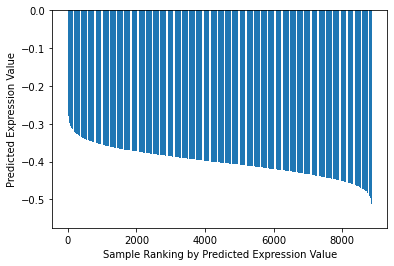

In [ ]:
plt.bar([i for i in range(len(y_pred))], sorted(y_pred, reverse=True))
plt.xlabel("Sample Ranking by Predicted Expression Value")
plt.ylabel("Predicted Expression Value")
plt.show()

In [ ]:
# generate a random sample of 
sample = pd.DataFrame([y_test, y_pred]).transpose().sample(25).reset_index().drop(columns=["index"])
sample.head()

,0,1
0,-0.69,-0.406314
1,0.18,-0.394305
2,0.15,-0.472179
3,-0.75,-0.353988
4,-0.64,-0.323375


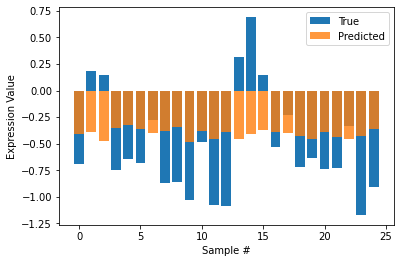

In [ ]:
plt.bar(sample.index, sample[0], alpha=1)
plt.bar(sample.index, sample[1], alpha=0.8)
plt.legend(["True", "Predicted"])
plt.xlabel("Sample #")
plt.ylabel("Expression Value")
plt.show()

---
## New Train/Test Split

### Chloroplast only

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import spearmanr # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [ ]:
# read in dataframe
df_target = pd.read_csv('data/raw/hidra.tsv', sep="\t", header=None)

In [ ]:
# read in node values
df_input = pd.read_csv('data/processed/CanolaTargetsKeras.csv', index_col=0)

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,node1,...,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26,0.057192,...,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27,0.248029,...,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27,0.265661,...,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27,0.369960,...,0.464377,0.072154,0.109099,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27,0.371398,...,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74881,NC_008285.1,221685,221830,ATGGAGTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTG...,183,67,62.04,85.98,0.47,0.152861,...,0.144980,0.027386,0.080423,0.068115,0.150996,-0.008054,0.086877,-0.046644,0.108610,0.032764
74882,NC_008285.1,221690,221835,GTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCC...,179,67,60.68,85.98,0.50,0.164062,...,0.190059,0.086968,-0.023107,0.039091,0.214144,0.073554,0.172308,-0.009725,0.006846,-0.009138
74883,NC_008285.1,221695,221840,GTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAA...,178,65,60.34,83.41,0.47,0.277453,...,0.281420,0.119688,0.076970,0.115687,0.244967,0.114259,0.210322,0.022490,0.083391,0.054204
74884,NC_008285.1,221700,221845,GCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAAGCCAA...,165,62,55.93,79.56,0.51,0.157357,...,0.151819,-0.076939,-0.047714,-0.070762,0.014980,-0.009687,0.002792,-0.166218,-0.009043,-0.110434


In [ ]:
df = df[df[0] == "NC_016734.1"]  # chloro
# df = df[df[0] == "NC_008285.1"]  # mito

In [ ]:
# grab input features and target feature
X = np.array(df[["node"+str(i) for i in range(1,13)]])
y = np.array(df[8])

In [ ]:
idx = int(X.shape[0]/5)  # index of 20/80 boundary

X_test = X[:idx]
y_test = y[:idx]

X_train = X[idx:]
y_train = y[idx:]

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([ 3.12815682,  2.84763734, -5.47151876, -1.05794305, -0.85099947,
        1.86054966,  0.38059712,  1.08969523, -1.271408  ,  4.19381247,
        3.78629549, -6.86344835])

In [ ]:
reg.score(X_test, y_test)  # coefficient of determination R^2

-1.1303397735314267

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)  # MSE

0.3558284268638995

In [ ]:
spearmanr(y_test, y_pred)  # spearman coefficient

SpearmanrResult(correlation=0.44067311364649686, pvalue=1.225534142880134e-288)

In [ ]:
print("Mean of target values:\t\t", np.mean(y_test))
print("Mean of predicted values:\t", np.mean(y_pred))

Mean of target values:		 -0.5492829076620825
Mean of predicted values:	 -0.09375217459918299


In [ ]:
print("Std.dev of target values:\t", np.std(y_test))
print("Std.dev of predicted values:\t", np.std(y_pred))

Std.dev of target values:	 0.4086917607766426
Std.dev of predicted values:	 0.24720765488066399


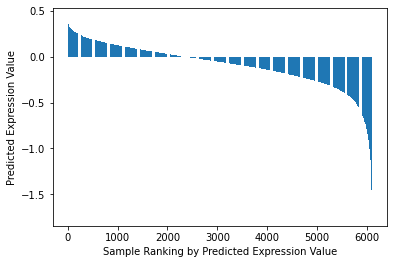

In [ ]:
plt.bar([i for i in range(len(y_pred))], sorted(y_pred, reverse=True))
plt.xlabel("Sample Ranking by Predicted Expression Value")
plt.ylabel("Predicted Expression Value")
plt.show()

In [ ]:
# generate a random sample of 
sample = pd.DataFrame([y_test, y_pred]).transpose().sample(25).reset_index().drop(columns=["index"])
sample.head()

,0,1
0,-0.26,-0.543008
1,-0.88,0.053147
2,-1.04,0.138422
3,-0.18,-0.276439
4,-0.90,-0.154618


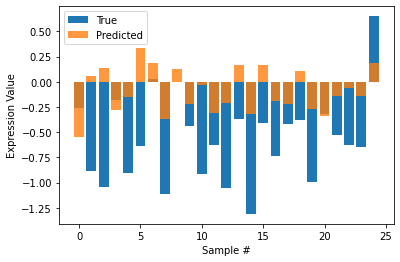

In [ ]:
plt.bar(sample.index, sample[0], alpha=1)
plt.bar(sample.index, sample[1], alpha=0.8)
plt.legend(["True", "Predicted"])
plt.xlabel("Sample #")
plt.ylabel("Expression Value")
plt.show()

---

### Mitochondrion only

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import spearmanr # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [ ]:
# read in dataframe
df_target = pd.read_csv('data/raw/hidra.tsv', sep="\t", header=None)

In [ ]:
# read in node values
df_input = pd.read_csv('data/processed/CanolaTargetsKeras.csv', index_col=0)

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,node1,...,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26,0.057192,...,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27,0.248029,...,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27,0.265661,...,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27,0.369960,...,0.464377,0.072154,0.109099,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27,0.371398,...,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74881,NC_008285.1,221685,221830,ATGGAGTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTG...,183,67,62.04,85.98,0.47,0.152861,...,0.144980,0.027386,0.080423,0.068115,0.150996,-0.008054,0.086877,-0.046644,0.108610,0.032764
74882,NC_008285.1,221690,221835,GTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCC...,179,67,60.68,85.98,0.50,0.164062,...,0.190059,0.086968,-0.023107,0.039091,0.214144,0.073554,0.172308,-0.009725,0.006846,-0.009138
74883,NC_008285.1,221695,221840,GTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAA...,178,65,60.34,83.41,0.47,0.277453,...,0.281420,0.119688,0.076970,0.115687,0.244967,0.114259,0.210322,0.022490,0.083391,0.054204
74884,NC_008285.1,221700,221845,GCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAAGCCAA...,165,62,55.93,79.56,0.51,0.157357,...,0.151819,-0.076939,-0.047714,-0.070762,0.014980,-0.009687,0.002792,-0.166218,-0.009043,-0.110434


In [ ]:
# df = df[df[0] == "NC_016734.1"]  # chloro
df = df[df[0] == "NC_008285.1"]  # mito

In [ ]:
# grab input features and target feature
X = np.array(df[["node"+str(i) for i in range(1,13)]])
y = np.array(df[8])

In [ ]:
idx = int(X.shape[0]/5)  # index of 20/80 boundary

X_test = X[:idx]
y_test = y[:idx]

X_train = X[idx:]
y_train = y[idx:]

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([-3.64120012, -4.42042923,  6.93980173, -2.23686146, -1.98133892,
        3.70201168, -2.37442864, -1.98217611,  3.66886573,  3.00154305,
        2.81305373, -4.97626223])

In [ ]:
reg.score(X_test, y_test)  # coefficient of determination R^2

-0.043838154785612815

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)  # MSE

0.23531329521189917

In [ ]:
spearmanr(y_test, y_pred)  # spearman coefficient

SpearmanrResult(correlation=0.04742667258022703, pvalue=7.89332246398778e-06)

In [ ]:
print("Mean of target values:\t\t", np.mean(y_test))
print("Mean of predicted values:\t", np.mean(y_pred))

Mean of target values:		 -0.321765899864682
Mean of predicted values:	 -0.421339567996362


In [ ]:
print("Std.dev of target values:\t", np.std(y_test))
print("Std.dev of predicted values:\t", np.std(y_pred))

Std.dev of target values:	 0.47479556006979373
Std.dev of predicted values:	 0.040425183016207476


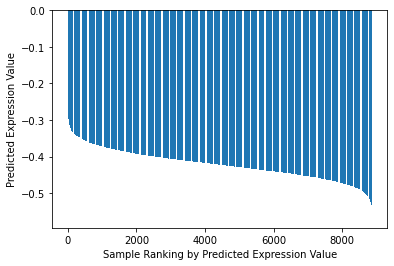

In [ ]:
plt.bar([i for i in range(len(y_pred))], sorted(y_pred, reverse=True))
plt.xlabel("Sample Ranking by Predicted Expression Value")
plt.ylabel("Predicted Expression Value")
plt.show()

In [ ]:
# generate a random sample of 
sample = pd.DataFrame([y_test, y_pred]).transpose().sample(25).reset_index().drop(columns=["index"])
sample.head()

,0,1
0,0.02,-0.427145
1,-0.26,-0.477034
2,-0.30,-0.429658
3,-0.22,-0.459745
4,0.01,-0.378183


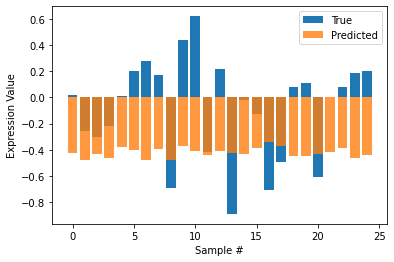

In [ ]:
plt.bar(sample.index, sample[0], alpha=1)
plt.bar(sample.index, sample[1], alpha=0.8)
plt.legend(["True", "Predicted"])
plt.xlabel("Sample #")
plt.ylabel("Expression Value")
plt.show()

---

### Train on Chloro, Test on Mito

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import spearmanr # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [ ]:
# read in dataframe
df_target = pd.read_csv('data/raw/hidra.tsv', sep="\t", header=None)

In [ ]:
# read in node values
df_input = pd.read_csv('data/processed/CanolaTargetsKeras.csv', index_col=0)

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,node1,...,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26,0.057192,...,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27,0.248029,...,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27,0.265661,...,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27,0.369960,...,0.464377,0.072154,0.109099,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27,0.371398,...,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74881,NC_008285.1,221685,221830,ATGGAGTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTG...,183,67,62.04,85.98,0.47,0.152861,...,0.144980,0.027386,0.080423,0.068115,0.150996,-0.008054,0.086877,-0.046644,0.108610,0.032764
74882,NC_008285.1,221690,221835,GTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCC...,179,67,60.68,85.98,0.50,0.164062,...,0.190059,0.086968,-0.023107,0.039091,0.214144,0.073554,0.172308,-0.009725,0.006846,-0.009138
74883,NC_008285.1,221695,221840,GTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAA...,178,65,60.34,83.41,0.47,0.277453,...,0.281420,0.119688,0.076970,0.115687,0.244967,0.114259,0.210322,0.022490,0.083391,0.054204
74884,NC_008285.1,221700,221845,GCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAAGCCAA...,165,62,55.93,79.56,0.51,0.157357,...,0.151819,-0.076939,-0.047714,-0.070762,0.014980,-0.009687,0.002792,-0.166218,-0.009043,-0.110434


In [ ]:
df_chloro = df[df[0] == "NC_016734.1"]  # chloro
df_mito = df[df[0] == "NC_008285.1"]  # mito

In [ ]:
X_test = np.array(df_mito[["node"+str(i) for i in range(1,13)]])
y_test = np.array(df_mito[8])

X_train = np.array(df_chloro[["node"+str(i) for i in range(1,13)]])
y_train = np.array(df_chloro[8])

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([  7.66867417,   7.63108971, -13.55350054,  -1.04013875,
        -0.79535587,   1.85181465,   1.10994919,   1.85446227,
        -2.38317663,   2.17805768,   1.81560767,  -3.45135411])

In [ ]:
reg.score(X_test, y_test)  # coefficient of determination R^2

-1.1676489599956503

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)  # MSE

0.4896938569613968

In [ ]:
spearmanr(y_test, y_pred)  # spearman coefficient

SpearmanrResult(correlation=0.03390171140225273, pvalue=9.284485021145393e-13)

In [ ]:
print("Mean of target values:\t\t", np.mean(y_test))
print("Mean of predicted values:\t", np.mean(y_pred))

Mean of target values:		 -0.4028196743493753
Mean of predicted values:	 0.09151396384009144


In [ ]:
print("Std.dev of target values:\t", np.std(y_test))
print("Std.dev of predicted values:\t", np.std(y_pred))

Std.dev of target values:	 0.4753000414062562
Std.dev of predicted values:	 0.154859621095101


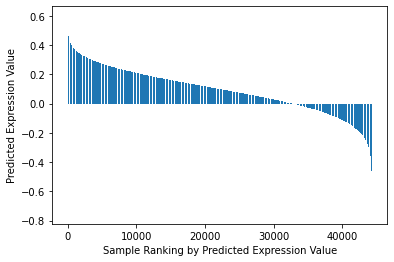

In [ ]:
plt.bar([i for i in range(len(y_pred))], sorted(y_pred, reverse=True))
plt.xlabel("Sample Ranking by Predicted Expression Value")
plt.ylabel("Predicted Expression Value")
plt.show()

In [ ]:
# generate a random sample of 
sample = pd.DataFrame([y_test, y_pred]).transpose().sample(25).reset_index().drop(columns=["index"])
sample.head()

,0,1
0,0.05,0.118458
1,0.12,0.122653
2,-0.99,-0.263540
3,-0.86,-0.025024
4,0.12,0.060319


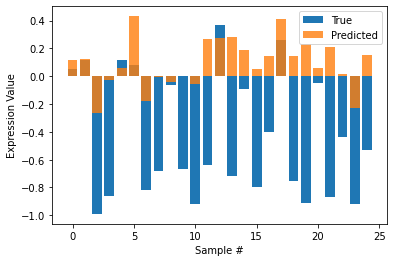

In [ ]:
plt.bar(sample.index, sample[0], alpha=1)
plt.bar(sample.index, sample[1], alpha=0.8)
plt.legend(["True", "Predicted"])
plt.xlabel("Sample #")
plt.ylabel("Expression Value")
plt.show()

---

### Train on Mito, Test on Chloro

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import spearmanr # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [ ]:
# read in dataframe
df_target = pd.read_csv('data/raw/hidra.tsv', sep="\t", header=None)

In [ ]:
# read in node values
df_input = pd.read_csv('data/processed/CanolaTargetsKeras.csv', index_col=0)

In [ ]:
df = pd.concat([df_target, df_input], axis=1)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,node1,...,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26,0.057192,...,0.069417,-0.091350,-0.131828,-0.127457,0.030535,-0.072821,-0.022544,-0.048606,-0.120532,-0.104665
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27,0.248029,...,0.328560,0.129749,-0.002474,0.077467,0.338646,0.145675,0.296574,-0.016733,0.063365,0.017852
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27,0.265661,...,0.289731,-0.020528,0.083776,0.045066,0.355833,0.135057,0.296520,0.133751,0.213709,0.198023
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27,0.369960,...,0.464377,0.072154,0.109099,0.109804,0.366931,0.279233,0.396484,0.112758,0.254343,0.209659
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27,0.371398,...,0.480646,0.084766,0.002434,0.055888,0.410235,0.252205,0.403355,0.126558,0.134649,0.152153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74881,NC_008285.1,221685,221830,ATGGAGTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTG...,183,67,62.04,85.98,0.47,0.152861,...,0.144980,0.027386,0.080423,0.068115,0.150996,-0.008054,0.086877,-0.046644,0.108610,0.032764
74882,NC_008285.1,221690,221835,GTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCC...,179,67,60.68,85.98,0.50,0.164062,...,0.190059,0.086968,-0.023107,0.039091,0.214144,0.073554,0.172308,-0.009725,0.006846,-0.009138
74883,NC_008285.1,221695,221840,GTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAA...,178,65,60.34,83.41,0.47,0.277453,...,0.281420,0.119688,0.076970,0.115687,0.244967,0.114259,0.210322,0.022490,0.083391,0.054204
74884,NC_008285.1,221700,221845,GCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAAGCCAA...,165,62,55.93,79.56,0.51,0.157357,...,0.151819,-0.076939,-0.047714,-0.070762,0.014980,-0.009687,0.002792,-0.166218,-0.009043,-0.110434


In [ ]:
df_chloro = df[df[0] == "NC_016734.1"]  # chloro
df_mito = df[df[0] == "NC_008285.1"]  # mito

In [ ]:
X_train = np.array(df_mito[["node"+str(i) for i in range(1,13)]])
y_train = np.array(df_mito[8])

X_test = np.array(df_chloro[["node"+str(i) for i in range(1,13)]])
y_test = np.array(df_chloro[8])

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([-4.02773047, -4.70798796,  7.51842758, -1.79567935, -1.53202152,
        2.9595081 , -1.99764352, -1.60432357,  3.03858656,  2.70069611,
        2.50202794, -4.45945043])

In [ ]:
reg.score(X_test, y_test)  # coefficient of determination R^2

-0.3074925703034348

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)  # MSE

0.34986880081681715

In [ ]:
spearmanr(y_test, y_pred)  # spearman coefficient

SpearmanrResult(correlation=0.26073124077814686, pvalue=0.0)

In [ ]:
print("Mean of target values:\t\t", np.mean(y_test))
print("Mean of predicted values:\t", np.mean(y_pred))

Mean of target values:		 -0.11711399947616556
Mean of predicted values:	 -0.4193506098415823


In [ ]:
print("Std.dev of target values:\t", np.std(y_test))
print("Std.dev of predicted values:\t", np.std(y_pred))

Std.dev of target values:	 0.517288702236914
Std.dev of predicted values:	 0.039287510572361795


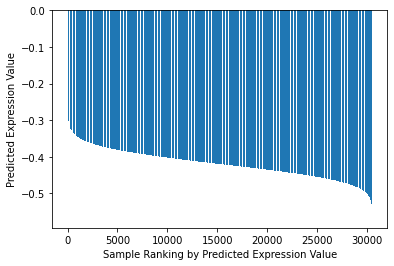

In [ ]:
plt.bar([i for i in range(len(y_pred))], sorted(y_pred, reverse=True))
plt.xlabel("Sample Ranking by Predicted Expression Value")
plt.ylabel("Predicted Expression Value")
plt.show()

In [ ]:
# generate a random sample of 
sample = pd.DataFrame([y_test, y_pred]).transpose().sample(25).reset_index().drop(columns=["index"])
sample.head()

,0,1
0,0.20,-0.403703
1,-0.74,-0.485406
2,-0.23,-0.417157
3,-0.85,-0.431550
4,-0.39,-0.407945


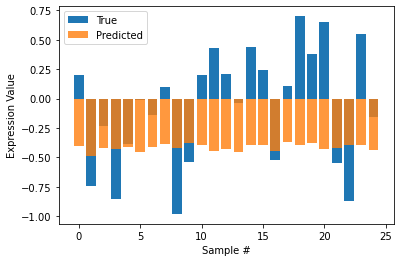

In [ ]:
plt.bar(sample.index, sample[0], alpha=1)
plt.bar(sample.index, sample[1], alpha=0.8)
plt.legend(["True", "Predicted"])
plt.xlabel("Sample #")
plt.ylabel("Expression Value")
plt.show()